In [ ]:
# импортируем саму библиотеку
import numpy as np

## Слайсинг массивов

Ко всем элементам можно получить доступ и манипулировать ими также, как вы бы это делали с обычными списками:

In [ ]:
a = np.array([1, 2, 3])
print(a, '|', type(a))

[1 2 3] | <class 'numpy.ndarray'>


In [ ]:
a[:2]

array([1, 2])

In [ ]:
a[::2]

array([1, 3])

Массив — центральная структура данных библиотеки NumPy. Это сетка значений, которая содержит информацию о необработанных данных, о том, как найти элемент и как интерпретировать элемент. Элементы сетки можно проиндексировать различными способами. Все они имеют одинаковый тип, называемый массивом dtype. Массив можно проиндексировать набором неотрицательных целых чисел, логическими значениями, другим массивом или целыми числами. Ранг массива — это число измерений. Форма массива представляет собой набор целых чисел, дающих размер массива по каждому измерению.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
print(a, '|', type(a))

[[1. 2. 3.]
 [4. 5. 6.]] | <class 'numpy.ndarray'>


Мы можем получить доступ к элементам в массиве, используя квадратные скобки. Когда вы обращаетесь к элементам, помните, что индексирование в NumPy начинается с 0. Это означает, что если вы хотите получить доступ к первому элементу в вашем массиве, вы получите доступ к элементу «0».

In [ ]:
a[0]

array([1., 2., 3.])

Доступ к элементу во 2-й строке, 3 столбце (т.к. индексация с 0).

In [ ]:
a[1,2]

6.0

### Индексирование и нарезка

In [ ]:
data = np.array([1, 2, 3])

In [ ]:
data[1]

2

In [ ]:
data[0:2]

array([1, 2])

In [ ]:
data[1:]

array([2, 3])

In [ ]:
data[-2:]

array([2, 3])

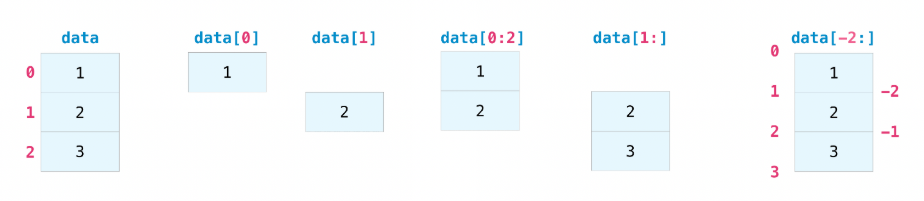

Array slicing работает с многомерными массивами аналогично, как и с одномерными, применяя каждый срез, как фильтр для установленного измерения. Используйте ":" в измерении для указывания использования всех элементов этого измерения:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
# выбираем колонки с шагом 2
a[::, ::2]

array([[1., 3.],
       [4., 6.]])

In [ ]:
# выбираем вторую строку (индекс 1), каждую 2 колонку
a[1,::2]

array([4., 6.])

In [ ]:
# берем вторую строку и со 2й колоки по последнюю
a[1:2, 1:3]

array([[5., 6.]])

Возможно, вы захотите взять часть вашего массива или определенные элементы массива для использования в дальнейшем анализе или дополнительных операциях. Чтобы сделать это, вам нужно поднастроить, нарезать и / или проиндексировать ваши массивы.

Если вы хотите выбрать значения из вашего массива, которые удовлетворяют определенным условиям, это просто сделать с NumPy.

Например, если вы начинаете с этого массива:

In [ ]:
a = np.array([1 , 2, 3, 4, 5, 6, 7, 8])

In [ ]:
a < 5

array([ True,  True,  True,  True, False, False, False, False])

In [ ]:
a[a < 5]

array([1, 2, 3, 4])

Вы также можете выбрать, например, числа, которые равны или больше 5, и использовать это условие для индексации массива.

In [ ]:
a = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
five_up = (a >= 5)
a[five_up]

array([ 5,  6,  7,  8,  9, 10, 11, 12])

Вы можете выбрать элементы, которые делятся на 2:

In [ ]:
divisible_by_2 = a[a%2==0]
divisible_by_2

array([ 2,  4,  6,  8, 10, 12])

Или вы можете выбрать элементы, которые удовлетворяют два условия с использованием & и | операторов:

In [ ]:
c = a[(a > 2) & (a < 11)]
c

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
c = a[(a < 2) | (a > 11)]
c

array([ 1, 12])

Кроме того, вы можете использовать логические операторы & и |, чтобы вернуть логические значения, которые указывают, соответствуют ли значения в массиве определенному условию. Это может быть полезно для массивов, которые содержат имена или другие категориальные значения.

In [ ]:
five_up = (a > 5) | (a == 4)
five_up

array([[False, False, False,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
a[five_up]

array([ 4,  6,  7,  8,  9, 10, 11, 12])

Вы можете использовать np.nonzero() для печати индексов элементов, которые, например, меньше 5:

In [ ]:
b = np.nonzero(a < 5)
b

(array([0, 0, 0, 0]), array([0, 1, 2, 3]))

В этом примере был возвращен кортеж массивов: по одному для каждого измерения. Первый массив представляет индексы строк, в которых находятся эти значения, а второй массив представляет индексы столбцов, в которых находятся эти значения.

Если вы хотите сгенерировать список координат, в которых существуют элементы, вы можете сжать массивы, перебрать список координат и распечатать их. Например:

In [ ]:
list_of_coordinates= list(zip(b[0], b[1]))

for coord in list_of_coordinates:
    print(coord)

(0, 0)
(0, 1)
(0, 2)
(0, 3)


## Многомерные массивы и поэлементные операции

Основные математические функции работают поэлементно над массивами.

После того, как вы создали свои массивы, вы можете начать работать с ними. Допустим, вы создали два массива: один называется «данные», а другой — «один».

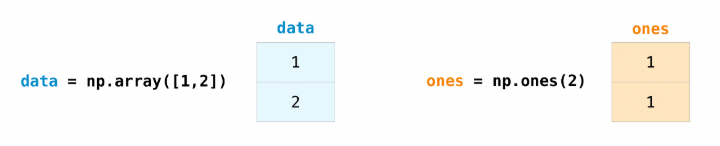

In [ ]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

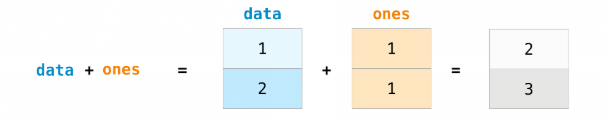

In [ ]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

Конечно, вы можете сделать больше, чем просто дополнение!

In [ ]:
data - ones

array([0, 1])

In [ ]:
data * data

array([1, 4])

In [ ]:
data / data

array([1., 1.])

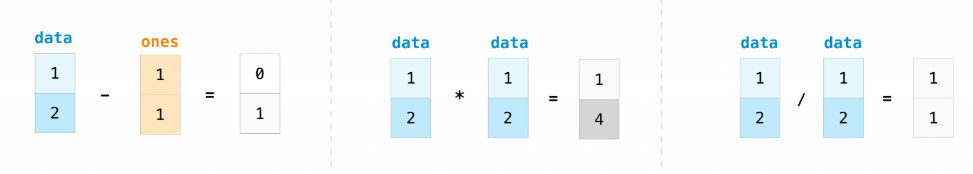

Основные операции просты с NumPy. Если вы хотите найти сумму элементов в массиве, используйте sum(). Это работает для 1D-массивов, 2D-массивов и массивов в более высоких измерениях.

In [ ]:
a = np.array([1, 2, 3, 4])

a.sum()

10

Чтобы добавить строки или столбцы в 2D-массив, вы должны указать ось.

Если вы начнете с этого массива:

In [ ]:
b = np.array([[1, 1], [2, 2]])

In [ ]:
b.sum(axis=0)

array([3, 3])

In [ ]:
b.sum(axis=1)

array([2, 4])

В некоторых случаях вам может понадобиться выполнить операцию между массивом и одним числом (ее называют операцией между вектором и скаляром) или между массивами двух разных размеров. Например, ваш массив (назовем его «данные») может содержать информацию о расстоянии в милях, но вы хотите преобразовать мили в километры. Вы можете выполнить эту операцию с:

In [ ]:
data = np.array([1.0, 2.0])
data * 1.6

array([1.6, 3.2])

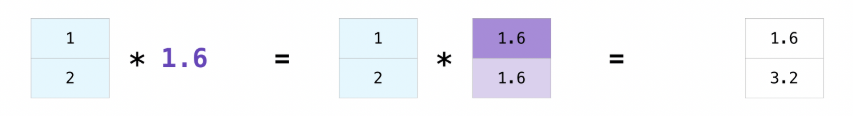

NumPy понимает, что умножение должно происходить с каждой ячейкой. Эта концепция называется вещанием . Вещание — это механизм, который позволяет NumPy выполнять операции над массивами различной формы. Размеры вашего массива должны быть совместимы, например, когда размеры обоих массивов равны или когда один из них равен 1. Если размеры не совместимы, вы получите ValueError.

### Полезные операции с массивами

NumPy также выполняет функции агрегирования. В дополнение к min, max, sum, вы можете легко запустить mean, чтобы получить среднее значение. Prod — чтобы получить результат умножения элементов. Std — чтобы получить стандартное отклонение, и многое другое.

In [ ]:
data = np.array([1, 2, 3])

In [ ]:
data.max()

3

In [ ]:
data.min()

1

In [ ]:
data.sum()

6

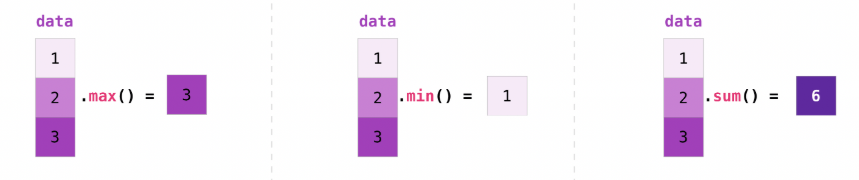

In [ ]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

Очень часто хочется собирать данные по ряду или столбцу. По умолчанию каждая функция агрегации NumPy возвращает агрегат всего массива. Чтобы найти сумму или минимум элементов в вашем массиве, запустите:

In [ ]:
a.sum()

4.8595784

In [ ]:
a.min()

0.05093587

Вы можете указать, по какой оси вы хотите вычислить функцию агрегирования. Например, вы можете найти минимальное значение в каждом столбце, указав axis=0.

In [ ]:
# минимальное по столбцам
a.min(axis=0)

array([0.12697628, 0.05093587, 0.26590556, 0.5510652 ])

In [ ]:
# стандартное отклонение по столбцам
a.std(axis=0)

array([0.1794018 , 0.33973673, 0.05524104, 0.00759016])

In [ ]:
# среднее по строкам
a.mean(axis=1)

array([0.37958214, 0.38858639, 0.44672607])

## Изменение формы массива

Часто нужно транспонировать матрицы. У массивов NumPy есть свойство, которое позволяет вам транспонировать матрицу.

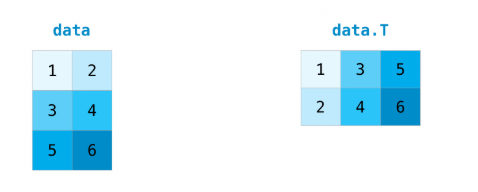

In [ ]:
data = np.array([[1, 2], [3, 4], [5, 6]])

Вам также может понадобиться переключить размеры матрицы. Например, когда у вас есть модель, которая ожидает определенную входную форму, отличную от вашего набора данных. Здесь поможет метод reshape. Вам просто нужно передать новые измерения, которые вы хотите для матрицы.

In [ ]:
data.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
data.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

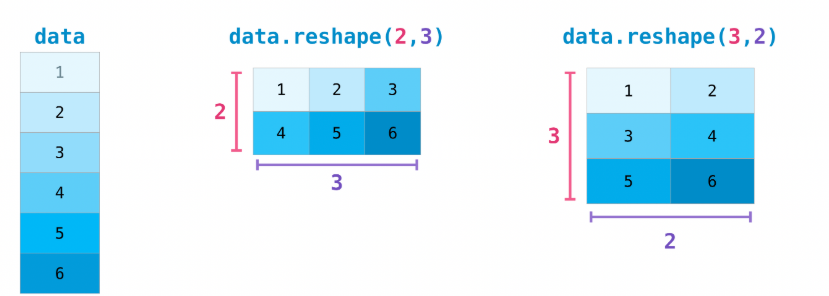

Используйте .transpose для реверса или изменения осей массива в соответствии с указанными вами значениями.

In [ ]:
arr = np.arange(6).reshape((2, 3))
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
arr.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

np.flip() позволяет переворачивать содержимое массива вдоль оси.

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
reversed_arr = np.flip(arr)

In [ ]:
reversed_arr

array([8, 7, 6, 5, 4, 3, 2, 1])

In [ ]:
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
arr_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
reversed_arr = np.flip(arr_2d)

In [ ]:
reversed_arr

array([[12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

по строкам:

In [ ]:
reversed_arr_rows = np.flip(arr_2d, axis=0)
print(reversed_arr_rows)

[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


по колонкам:

In [ ]:
reversed_arr_columns = np.flip(arr_2d, axis=1)

In [ ]:
reversed_arr_columns

array([[ 4,  3,  2,  1],
       [ 8,  7,  6,  5],
       [12, 11, 10,  9]])